<a href="https://drive.google.com/drive/folders/11Sp37Zj6NPHnBnDI9A5GH63nkNqvfojc?usp=sharing" target="_parent"><img src="https://ssl.gstatic.com/images/branding/product/1x/drive_2020q4_48dp.png" alt="Open In Google Drive"/></a>

In [1]:
!pip install -r requirements-colab.txt

Obtaining file:///home/haonguyentan/Essay.vfinal (from -r requirements-colab.txt (line 10))
     |████████████████████████████████| 1.8 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 108 kB 13.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 147 kB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 46 kB 6.5 MB/s  eta 0:00:01
     |████████████████████████████████| 5.3 MB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 12.6 MB/s eta 0:00:01
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
     |████████████████████████████████| 174 kB 12.6 MB/s eta 0:00:01
     |████████████████████████████████| 182 kB 12.2 MB/s eta 0:00:01
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
     |████████████████████████████████| 78 kB 8.3 MB/s  eta 0:00:01
     |████████████████████████████████| 3.3 

In [5]:
import torch
from src import models
from PIL import Image

device = "cpu"
checkpoint = "./models/final_models.ckpt"
config = "./models/config.yaml"
        

In [6]:
@torch.no_grad()
def infer(model, prompt, n_samples, scale, skips=250):
    images, clip_score = model(prompt, n_samples_per_txt=n_samples, cond_scale=scale, skips=skips, clip_sort=True)
    images = images.cpu()
    make_im = lambda x: (255*x.clamp(-1, 1)/2 + 127.5).to(torch.uint8).permute(1,2,0).numpy()
    images = [Image.fromarray(make_im(x)) for x in images]
    return images, clip_score

model = models.StyleGAN(config, device, checkpoint)

100%|███████████████████████████████████████| 354M/354M [01:16<00:00, 4.60MiB/s]


In [7]:
captions = 'pretty girl' # @param {'type': 'string'}

In [11]:
outputs, clip_score = infer(model, captions, 4, 4)

sampling loop time step: 100%|██████████| 4/4 [00:00<00:00, 13.83it/s]


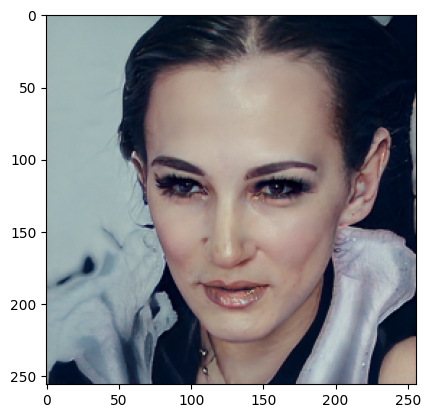

In [14]:
import matplotlib.pyplot as plt

for img in outputs:
    plt.imshow(img.resize((256, 256)))